### Build a machine learning model to predict whether the shipment will arrive on time or not. ( column ‘Reached.on.Time_Y.N’ from the attached data needs to be predicted )
 
You can consider that shipment which would arrive late is a higher risk for business. So, predicting potentially delayed shipments would be a big win so that business can take necessary steps to mitigate the issues.

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report
from sklearn.model_selection import GridSearchCV
import category_encoders as ce
import warnings
warnings.filterwarnings("ignore")

In [59]:
data = pd.read_csv('data.csv')
data.head(5)

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177.0,3,low,F,44,1233.0,1
1,2,F,Flight,4,5,216.0,2,low,M,59,3088.0,1
2,3,A,Flight,2,2,183.0,4,low,M,48,3374.0,1
3,4,B,Flight,3,3,176.0,4,medium,M,10,1177.0,1
4,5,C,Flight,2,2,184.0,3,medium,F,46,2484.0,1


In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   10999 non-null  int64  
 1   Warehouse_block      10999 non-null  object 
 2   Mode_of_Shipment     10999 non-null  object 
 3   Customer_care_calls  10999 non-null  int64  
 4   Customer_rating      10999 non-null  int64  
 5   Cost_of_the_Product  10901 non-null  float64
 6   Prior_purchases      10999 non-null  int64  
 7   Product_importance   10845 non-null  object 
 8   Gender               10999 non-null  object 
 9   Discount_offered     10999 non-null  int64  
 10  Weight_in_gms        10860 non-null  float64
 11  Reached.on.Time_Y.N  10999 non-null  int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 1.0+ MB


In [61]:
data.describe(include='all')

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.00000,10999,10999,10999.000000,10999.000000,10901.000000,10999.000000,10845,10999,10999.000000,10860.000000,10999.000000
unique,NaN,5,3,NaN,NaN,NaN,NaN,3,2,NaN,NaN,NaN
top,NaN,F,Ship,NaN,NaN,NaN,NaN,low,F,NaN,NaN,NaN
freq,NaN,3666,7462,NaN,NaN,NaN,NaN,5217,5545,NaN,NaN,NaN
mean,5500.00000,NaN,NaN,4.054459,2.990545,210.194386,3.567597,NaN,NaN,13.373216,3641.667035,0.596691
std,3175.28214,NaN,NaN,1.141490,1.413603,48.063598,1.522860,NaN,NaN,16.205527,1635.078989,0.490584
min,1.00000,NaN,NaN,2.000000,1.000000,96.000000,2.000000,NaN,NaN,1.000000,1001.000000,0.000000
25%,2750.50000,NaN,NaN,3.000000,2.000000,169.000000,3.000000,NaN,NaN,4.000000,1843.500000,0.000000
50%,5500.00000,NaN,NaN,4.000000,3.000000,214.000000,3.000000,NaN,NaN,7.000000,4157.500000,1.000000
75%,8249.50000,NaN,NaN,5.000000,4.000000,251.000000,4.000000,NaN,NaN,10.000000,5058.250000,1.000000


In [62]:
print(data.isnull().sum())
print(data.isnull().sum()*100/len(data))

ID                       0
Warehouse_block          0
Mode_of_Shipment         0
Customer_care_calls      0
Customer_rating          0
Cost_of_the_Product     98
Prior_purchases          0
Product_importance     154
Gender                   0
Discount_offered         0
Weight_in_gms          139
Reached.on.Time_Y.N      0
dtype: int64
ID                     0.000000
Warehouse_block        0.000000
Mode_of_Shipment       0.000000
Customer_care_calls    0.000000
Customer_rating        0.000000
Cost_of_the_Product    0.890990
Prior_purchases        0.000000
Product_importance     1.400127
Gender                 0.000000
Discount_offered       0.000000
Weight_in_gms          1.263751
Reached.on.Time_Y.N    0.000000
dtype: float64


In [63]:
data.map(np.isreal).all()

ID                      True
Warehouse_block        False
Mode_of_Shipment       False
Customer_care_calls     True
Customer_rating         True
Cost_of_the_Product     True
Prior_purchases         True
Product_importance     False
Gender                 False
Discount_offered        True
Weight_in_gms           True
Reached.on.Time_Y.N     True
dtype: bool

#### Missing values with type
1. Cost_of_the_Product : Numerical
2. Product_importance  : Categorical
3. Weight_in_gms       : Numerical

[Text(0.5, 0, 'Cost_of_the_Product')]

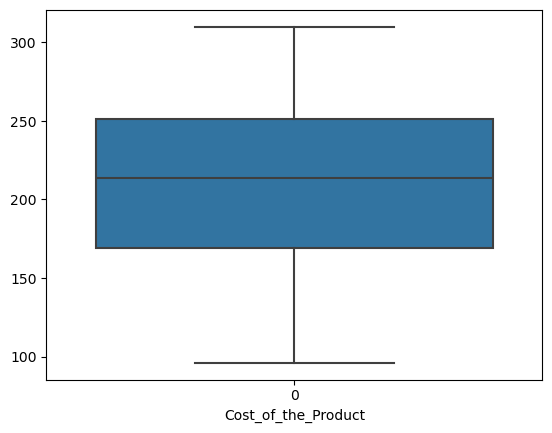

In [65]:
sns.boxplot(data['Cost_of_the_Product']).set(xlabel= 'Cost_of_the_Product')

[Text(0.5, 0, 'Weight_in_gms')]

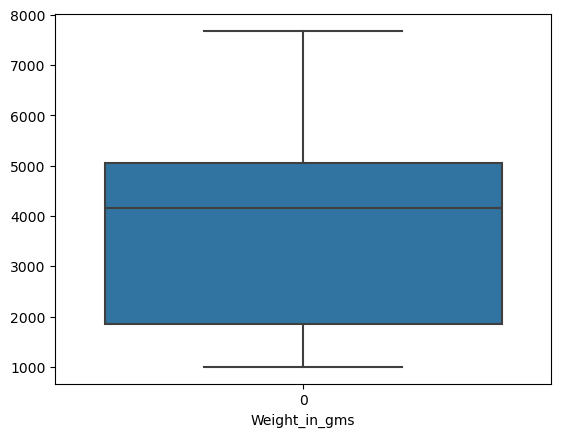

In [66]:
sns.boxplot(data['Weight_in_gms']).set(xlabel= 'Weight_in_gms')

In [67]:
print("mean Cost_of_the_Product before imputation: ", data['Cost_of_the_Product'].mean())
data['Cost_of_the_Product'].fillna(data['Cost_of_the_Product'].median(),inplace=True)
print("mean Cost_of_the_Product after imputation: ", data['Cost_of_the_Product'].mean())
print(data.isnull().sum())

mean Cost_of_the_Product before imputation:  210.1943858361618
mean Cost_of_the_Product after imputation:  210.22829348122556
ID                       0
Warehouse_block          0
Mode_of_Shipment         0
Customer_care_calls      0
Customer_rating          0
Cost_of_the_Product      0
Prior_purchases          0
Product_importance     154
Gender                   0
Discount_offered         0
Weight_in_gms          139
Reached.on.Time_Y.N      0
dtype: int64


In [68]:
print("mean Weight_in_gms before imputation: ", data['Weight_in_gms'].mean())
data['Weight_in_gms'].fillna(data['Weight_in_gms'].median(),inplace=True)
print("mean Weight_in_gms after imputation: ", data['Weight_in_gms'].mean())
print(data.isnull().sum())

mean Weight_in_gms before imputation:  3641.6670349907918
mean Weight_in_gms after imputation:  3648.185880534594
ID                       0
Warehouse_block          0
Mode_of_Shipment         0
Customer_care_calls      0
Customer_rating          0
Cost_of_the_Product      0
Prior_purchases          0
Product_importance     154
Gender                   0
Discount_offered         0
Weight_in_gms            0
Reached.on.Time_Y.N      0
dtype: int64


<Axes: xlabel='Weight_in_gms'>

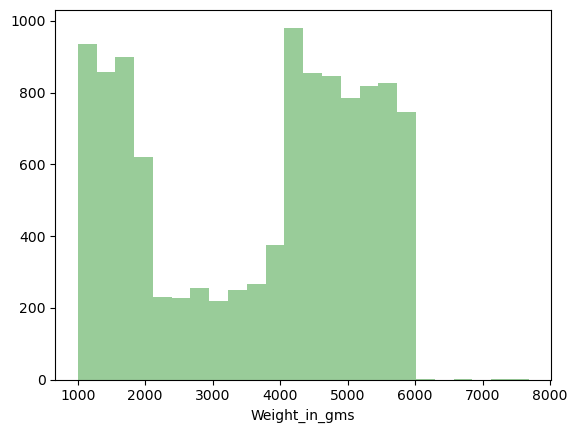

In [69]:
sns.distplot(data['Weight_in_gms'], hist = True, kde = False,color ="green")

<Axes: xlabel='Cost_of_the_Product'>

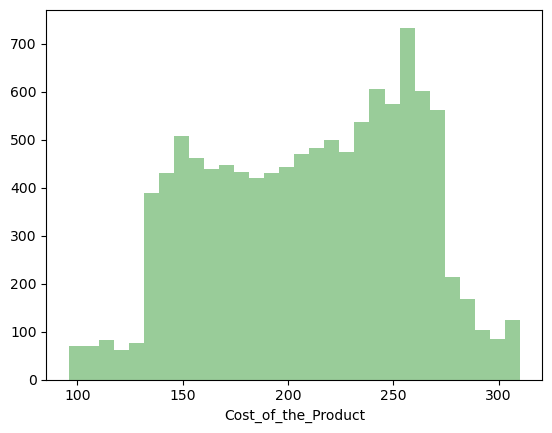

In [70]:
sns.distplot(data['Cost_of_the_Product'], hist = True, kde = False,color ="green")

In [71]:
data['Product_importance'].value_counts()

Product_importance
low       5217
medium    4698
high       930
Name: count, dtype: int64

In [72]:
data['Product_importance'].fillna('low',inplace=True)

In [73]:
data['Product_importance'].value_counts()

Product_importance
low       5371
medium    4698
high       930
Name: count, dtype: int64

In [74]:
print(data.isnull().sum())

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64


In [76]:
from scipy.stats import chi2_contingency
cat_cols=data[['Warehouse_block','Mode_of_Shipment','Product_importance','Gender']]
# defining the table
for column in cat_cols.columns:
    if(column!='Reached.on.Time_Y.N'):
        table = pd.crosstab(data[column], data['Reached.on.Time_Y.N'])
        print(table)
        stat, p, dof, expected = chi2_contingency(table)
        print("Chi-square test for feature: ", column
             )
        print("p-value : ", p)
        print("")
        print("")

Reached.on.Time_Y.N     0     1
Warehouse_block                
A                     758  1075
B                     729  1104
C                     739  1094
D                     738  1096
F                    1472  2194
Chi-square test for feature:  Warehouse_block
p-value :  0.8959524278243698


Reached.on.Time_Y.N     0     1
Mode_of_Shipment               
Flight                708  1069
Road                  725  1035
Ship                 3003  4459
Chi-square test for feature:  Mode_of_Shipment
p-value :  0.6895487627593786


Reached.on.Time_Y.N     0     1
Product_importance             
high                  324   606
low                  2187  3184
medium               1925  2773
Chi-square test for feature:  Product_importance
p-value :  0.0016597274905880116


Reached.on.Time_Y.N     0     1
Gender                         
F                    2249  3296
M                    2187  3267
Chi-square test for feature:  Gender
p-value :  0.6367032124181522




In [77]:
numerical_columns = ['Customer_care_calls','Customer_rating','Cost_of_the_Product','Prior_purchases','Discount_offered','Weight_in_gms','Reached.on.Time_Y.N']
data_notReached = data[data['Reached.on.Time_Y.N'] == 0]
data_notReached[numerical_columns].describe()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,4436.000000,4436.000000,4436.000000,4436.000000,4436.000000,4436.000000,4436.0
mean,4.147656,2.967989,214.495717,3.670424,5.545987,4174.792155,0.0
std,1.162771,1.414808,47.588245,1.525444,2.877727,1563.526545,0.0
min,2.000000,1.000000,97.000000,2.000000,1.000000,1001.000000,0.0
25%,3.000000,2.000000,175.000000,3.000000,3.000000,4053.000000,0.0
50%,4.000000,3.000000,221.000000,3.000000,6.000000,4663.000000,0.0
75%,5.000000,4.000000,254.000000,4.000000,8.000000,5333.250000,0.0
max,7.000000,5.000000,310.000000,10.000000,10.000000,6000.000000,0.0


In [78]:
data_reached = data[data['Reached.on.Time_Y.N'] == 1]
data_reached[numerical_columns].describe()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,6563.000000,6563.000000,6563.000000,6563.000000,6563.000000,6563.000000,6563.0
mean,3.991467,3.005790,207.343898,3.498095,18.663721,3292.247219,1.0
std,1.122592,1.412692,47.814999,1.517285,19.108797,1569.499233,0.0
min,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,1.0
25%,3.000000,2.000000,167.000000,3.000000,5.000000,1750.000000,1.0
50%,4.000000,3.000000,210.000000,3.000000,9.000000,3307.000000,1.0
75%,5.000000,4.000000,248.000000,4.000000,32.000000,4686.000000,1.0
max,7.000000,5.000000,310.000000,10.000000,65.000000,7684.000000,1.0


In [79]:
#For numerical data we are using t test.
from scipy import stats

for column in numerical_columns:
        samples_set1 = data_notReached[column]
        samples_set2 = data_reached[column]
        stat, p = stats.ttest_ind(samples_set1, samples_set2)
    
        print("ttest for feature: ", column)
        print("p-value : ", p)
        print("")
        print("")

ttest for feature:  Customer_care_calls
p-value :  1.8275351786239753e-12


ttest for feature:  Customer_rating
p-value :  0.16890489722530824


ttest for feature:  Cost_of_the_Product
p-value :  1.366943097729227e-14


ttest for feature:  Prior_purchases
p-value :  5.676140483966885e-09


ttest for feature:  Discount_offered
p-value :  0.0


ttest for feature:  Weight_in_gms
p-value :  6.050711833537469e-178


ttest for feature:  Reached.on.Time_Y.N
p-value :  0.0




####  Customer_rating, Gender  These features have p-value less than 0.05. So they are statistically not needed features. But, we will remove ID from dataset, because it's only index. We will keep other features for tarining the model as they can be important features for business.

In [42]:
data=data.drop(['ID'],axis=1)

In [80]:
data['Reached.on.Time_Y.N'].value_counts()

Reached.on.Time_Y.N
1    6563
0    4436
Name: count, dtype: int64

In [44]:
def train_test_split_and_features(data):
    y = data["Reached.on.Time_Y.N"]
    x = data.drop('Reached.on.Time_Y.N',axis=1)
    x = pd.get_dummies(x)
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state = 0)
    print(x.head(5))
    print(x.columns)
    features = list(x.columns)
    return x_train, x_test, y_train, y_test,features

In [45]:
x_train, x_test, y_train, y_test,features = train_test_split_and_features(data)

   Customer_care_calls  Customer_rating  Cost_of_the_Product  Prior_purchases  \
0                    4                2                177.0                3   
1                    4                5                216.0                2   
2                    2                2                183.0                4   
3                    3                3                176.0                4   
4                    2                2                184.0                3   

   Discount_offered  Weight_in_gms  Warehouse_block_A  Warehouse_block_B  \
0                44         1233.0              False              False   
1                59         3088.0              False              False   
2                48         3374.0               True              False   
3                10         1177.0              False               True   
4                46         2484.0              False              False   

   Warehouse_block_C  Warehouse_block_D  Warehouse_block

In [ ]:
# categorical_features = ['Warehouse_block','Mode_of_Shipment','Product_importance','Gender']
# ordinal_encoder = ce.OrdinalEncoder(cols=categorical_features)
# x_train_oe = x_train.copy()
# x_test_oe = x_test.copy()
# x_train_oe = ordinal_encoder.fit_transform(x_train_oe)
# x_test_oe = ordinal_encoder.transform(x_test_oe)
# x_train_oe.head()

In [46]:
data

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,D,Flight,4,2,177.0,3,low,F,44,1233.0,1
1,F,Flight,4,5,216.0,2,low,M,59,3088.0,1
2,A,Flight,2,2,183.0,4,low,M,48,3374.0,1
3,B,Flight,3,3,176.0,4,medium,M,10,1177.0,1
4,C,Flight,2,2,184.0,3,medium,F,46,2484.0,1
...,...,...,...,...,...,...,...,...,...,...,...
10994,A,Ship,4,1,252.0,5,medium,F,1,1538.0,1
10995,B,Ship,4,1,232.0,5,medium,F,6,1247.0,0
10996,C,Ship,5,4,242.0,5,low,F,4,1155.0,0
10997,F,Ship,5,2,223.0,6,medium,M,2,1210.0,0


In [47]:
x_train.describe(include='all')

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Warehouse_block_A,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F,Mode_of_Shipment_Flight,Mode_of_Shipment_Road,Mode_of_Shipment_Ship,Product_importance_high,Product_importance_low,Product_importance_medium,Gender_F,Gender_M
count,8799.000000,8799.000000,8799.000000,8799.000000,8799.000000,8799.000000,8799,8799,8799,8799,8799,8799,8799,8799,8799,8799,8799,8799,8799
unique,NaN,NaN,NaN,NaN,NaN,NaN,2,2,2,2,2,2,2,2,2,2,2,2,2
top,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,False,False,False,True,False,False,False,True,False
freq,NaN,NaN,NaN,NaN,NaN,NaN,7351,7312,7367,7304,5862,7390,7393,5984,8058,4469,5071,4467,4467
mean,4.060007,2.986817,210.008751,3.566428,13.574724,3647.399875,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,1.142313,1.411014,47.694930,1.508290,16.404215,1630.991758,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,3.000000,2.000000,170.000000,3.000000,4.000000,1847.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,4.000000,3.000000,214.000000,3.000000,7.000000,4157.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,5.000000,4.000000,250.000000,4.000000,10.000000,5061.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [48]:
def fit_and_evaluate_model(x_train, x_test, y_train, y_test,max_depth=5,min_samples_split=0.01,max_features=0.8,max_samples=0.8):
    random_forest =  RandomForestClassifier(random_state=0,\
                                            max_depth=max_depth,\
                                            min_samples_split=min_samples_split,\
                                            max_features=max_features,
                                            max_samples=max_samples)

    model = random_forest.fit(x_train, y_train)
    random_forest_predict = random_forest.predict(x_test)
    random_forest_conf_matrix = confusion_matrix(y_test, random_forest_predict)
    random_forest_acc_score = accuracy_score(y_test, random_forest_predict)
    print("confussion matrix")
    print(random_forest_conf_matrix)
    print("\n")
    print("Accuracy of Random Forest:",random_forest_acc_score*100,'\n')
    print(classification_report(y_test,random_forest_predict))
    return model

In [49]:
model = fit_and_evaluate_model(x_train, x_test, y_train, y_test)

confussion matrix
[[831  77]
 [631 661]]


Accuracy of Random Forest: 67.81818181818183 

              precision    recall  f1-score   support

           0       0.57      0.92      0.70       908
           1       0.90      0.51      0.65      1292

    accuracy                           0.68      2200
   macro avg       0.73      0.71      0.68      2200
weighted avg       0.76      0.68      0.67      2200



In [50]:
param_grid = [
  {'max_depth': [3,5,7,10], 'min_samples_split': [0.01,0.03, 0.07, 0.1], 
'max_features': [0.7,0.8,0.9,1.0],
'max_samples': [0.7,0.8,0.9,1.0]}]

In [51]:
model = RandomForestClassifier()
search = GridSearchCV(estimator = model, param_grid = param_grid, cv=5, verbose=5)
search.fit(x_train, y_train)

Fitting 5 folds for each of 256 candidates, totalling 1280 fits
[CV 1/5] END max_depth=3, max_features=0.7, max_samples=0.7, min_samples_split=0.01;, score=0.669 total time=   0.4s
[CV 2/5] END max_depth=3, max_features=0.7, max_samples=0.7, min_samples_split=0.01;, score=0.694 total time=   0.4s
[CV 3/5] END max_depth=3, max_features=0.7, max_samples=0.7, min_samples_split=0.01;, score=0.637 total time=   0.4s
[CV 4/5] END max_depth=3, max_features=0.7, max_samples=0.7, min_samples_split=0.01;, score=0.681 total time=   0.4s
[CV 5/5] END max_depth=3, max_features=0.7, max_samples=0.7, min_samples_split=0.01;, score=0.683 total time=   0.4s
[CV 1/5] END max_depth=3, max_features=0.7, max_samples=0.7, min_samples_split=0.03;, score=0.669 total time=   0.4s
[CV 2/5] END max_depth=3, max_features=0.7, max_samples=0.7, min_samples_split=0.03;, score=0.695 total time=   0.4s
[CV 3/5] END max_depth=3, max_features=0.7, max_samples=0.7, min_samples_split=0.03;, score=0.639 total time=   0.4s


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [3, 5, 7, 10],
                          'max_features': [0.7, 0.8, 0.9, 1.0],
                          'max_samples': [0.7, 0.8, 0.9, 1.0],
                          'min_samples_split': [0.01, 0.03, 0.07, 0.1]}],
             verbose=5)

In [52]:
results = pd.DataFrame(search.cv_results_)
results.sort_values('mean_test_score',inplace=True,ascending= False)
results.head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_max_samples,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
187,0.879867,0.031595,0.025220,0.008200,7,1.0,0.9,0.1,"{'max_depth': 7, 'max_features': 1.0, 'max_sam...",0.685795,0.696023,0.682386,0.682955,0.686185,0.686669,0.004912,1
106,0.854093,0.032795,0.028528,0.006563,5,0.9,0.9,0.07,"{'max_depth': 5, 'max_features': 0.9, 'max_sam...",0.686364,0.696023,0.682955,0.682955,0.683343,0.686328,0.005013,2
127,0.820021,0.022958,0.021868,0.007652,5,1.0,1.0,0.1,"{'max_depth': 5, 'max_features': 1.0, 'max_sam...",0.685795,0.695455,0.681818,0.682386,0.685048,0.686101,0.004916,3
123,0.774511,0.011529,0.018745,0.006249,5,1.0,0.9,0.1,"{'max_depth': 5, 'max_features': 1.0, 'max_sam...",0.685795,0.697727,0.682386,0.678977,0.685048,0.685987,0.006338,4
105,1.028875,0.222308,0.026035,0.008402,5,0.9,0.9,0.03,"{'max_depth': 5, 'max_features': 0.9, 'max_sam...",0.687500,0.695455,0.680114,0.680682,0.685617,0.685873,0.005561,5
94,0.999998,0.074159,0.030739,0.002836,5,0.8,1.0,0.07,"{'max_depth': 5, 'max_features': 0.8, 'max_sam...",0.685227,0.697727,0.679545,0.681250,0.684480,0.685646,0.006388,6
89,0.781428,0.031990,0.021870,0.007636,5,0.8,0.9,0.03,"{'max_depth': 5, 'max_features': 0.8, 'max_sam...",0.685795,0.697159,0.678409,0.680114,0.685617,0.685419,0.006562,7
86,0.782966,0.045869,0.032101,0.001240,5,0.8,0.8,0.07,"{'max_depth': 5, 'max_features': 0.8, 'max_sam...",0.685795,0.697727,0.677841,0.680682,0.685048,0.685419,0.006806,8
125,0.841529,0.007094,0.018764,0.006241,5,1.0,1.0,0.03,"{'max_depth': 5, 'max_features': 1.0, 'max_sam...",0.686364,0.699432,0.674432,0.681818,0.685048,0.685419,0.008137,8
126,0.826509,0.003054,0.020040,0.006137,5,1.0,1.0,0.07,"{'max_depth': 5, 'max_features': 1.0, 'max_sam...",0.686364,0.694318,0.679545,0.680682,0.685617,0.685305,0.005235,10


In [53]:
results_save = pd.DataFrame(search.cv_results_)
results_save.to_csv("results_save.csv", index =False)

In [54]:
search.best_params_

{'max_depth': 7,
 'max_features': 1.0,
 'max_samples': 0.9,
 'min_samples_split': 0.1}

In [55]:
model = fit_and_evaluate_model(x_train, x_test, y_train, y_test, max_depth=7,min_samples_split=0.1,\
                               max_features=1.0,max_samples= 0.9)

confussion matrix
[[836  72]
 [630 662]]


Accuracy of Random Forest: 68.0909090909091 

              precision    recall  f1-score   support

           0       0.57      0.92      0.70       908
           1       0.90      0.51      0.65      1292

    accuracy                           0.68      2200
   macro avg       0.74      0.72      0.68      2200
weighted avg       0.77      0.68      0.67      2200



In [56]:
importances = pd.DataFrame(model.feature_importances_)
importances['features'] = features
importances.columns = ['importance','feature']
importances.sort_values(by = 'importance', ascending= True,inplace=True)

<BarContainer object of 19 artists>

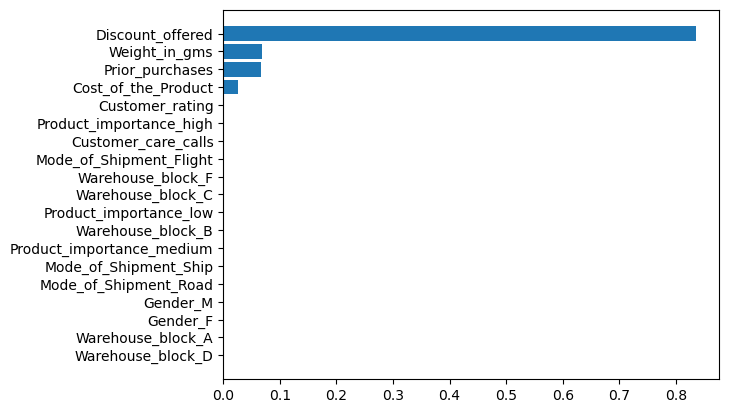

In [57]:
import matplotlib.pyplot as plt
plt.barh(importances.feature, importances.importance)